<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** percipitate the flow of a neural network; individual 'piece' of a neural network that takes inputs and generates/passed on output
- **Input Layer:** layer of a neural network that takes an input; first layer of neural network
- **Hidden Layer:** layer of a neural network that manipulates inputs using weights and biases; hidden layer can contain multiple layers
- **Output Layer:** layer of a neural network that outputs a result
- **Activation:** generates final output after passed sum of products from all neuron firings; each neuron has its own activation function (typically each node/neuron in a given layer has the same activation function); decides whether a given node 'fires' or not, how much signal to pass on to next layer
- **Backpropagation:** algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [70]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


candy = pd.read_csv('chocolate_gummy_bears.csv')

In [4]:
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. Explain why you could not achieve a higher accuracy with a *simple perceptron*. It's possible to achieve ~95% accuracy on this dataset.

In [11]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7500, 2), (7500,), (2500, 2), (2500,))

In [77]:
# import perceptron from lecture notebook
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [78]:
perc = Perceptron(0.01, 100)

In [79]:
perc.fit(X_train, y_train)

In [80]:
y_pred = perc.predict(X_test)

In [84]:
accuracy_score(y_pred, y_test)

0.25

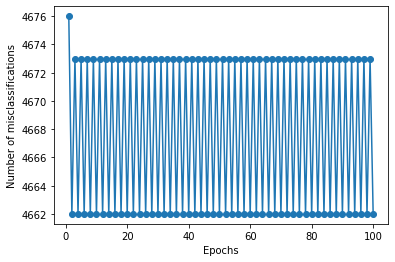

In [85]:
plt.plot(range(1, len(perc.errors) + 1), perc.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [67]:
# import two layer perceptron class
class TwoLayerNetSimple(object):
    """
    Simple two fully connected layers net with simple loss function loss = y - y_pred
    """
    def __init__(self, input_dim = 3, hidden_dim = 64, output_dim = 1, iterations=10000):
        self.iterations = iterations

        # initiailize weights
        self.W1 = np.random.rand(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros(hidden_dim)
        self.W2 = np.random.rand(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros(output_dim)
        self.loss = []
        pass
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def affine_forward(self, x, w, b):
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    def affine_backward(self, dout, cache):
        x, w, b = cache
        dx = dout.dot(w.T).reshape(x.shape)
        dw = x.T.dot(dout)
        db = np.sum(dout, axis=0)
        return dx, dw, db
        
    def fit(self, x, y):
        
        for i in range(self.iterations):           
            # forward prop
            a1, cache_l1 = self.affine_forward(x, self.W1, self.b1)
            out_l1 = self.sigmoid(a1)
            a2, cache_l2 = self.affine_forward(out_l1, self.W2, self.b2)

            # scoring
            out_l2 = self.sigmoid(a2)
            loss = y.reshape(-1, 1) - out_l2#.reshape(-1,1) - out_l2
            self.loss.append(loss[0][0])

            # back prop
            da2 = loss * self.dsigmoid(out_l2)
            dout_l2, dW2, db2 = self.affine_backward(da2, cache_l2)
            da1 = dout_l2 * self.dsigmoid(out_l1)
            _, dW1, db1 = self.affine_backward(da1, cache_l1)

            # gradient update
            self.W1 += dW1
            self.b1 += db1
            self.W2 += dW2
            self.b2 += db2
        pass
        
    def predict(self, x):
        x = np.array(x)
        a1, _ = self.affine_forward(x, self.W1, self.b1)
        out1 = self.sigmoid(a1)
        scores = self.affine_forward(out1, self.W2, self.b2)
        out = self.sigmoid(scores[0])
        return out

In [95]:
nn = TwoLayerNetSimple(input_dim=2, hidden_dim=1, output_dim=1, iterations=100)

In [96]:
nn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


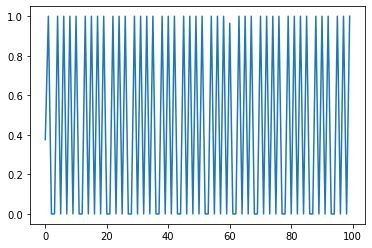

In [97]:
plt.plot(nn.loss);

In [98]:
y_pred2 = nn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


In [99]:
# accuracy score is better with two layer neural network because it allows for backpropogation

accuracy_score(y_test, y_pred2)

0.4956

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0


In [102]:
# ensure values
df = df.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [103]:
# create scalar to normalize
scaler = StandardScaler()

In [104]:
# scale entire dataframe
df_scaled = scaler.fit_transform(df)

In [106]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(df_scaled[:, :-1], df_scaled[:, -1], test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [107]:
# create model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dense, Dropout, Activation, Flatten, Input

In [110]:
model = Sequential()
model.add(Dense(1,input_dim=13, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=50)

Train on 227 samples
Epoch 1/50
227/227 [==============================] - 0s 2ms/sample - loss: 0.5425 - accuracy: 0.0000e+00
Epoch 2/50
227/227 [==============================] - 0s 124us/sample - loss: 0.5163 - accuracy: 0.0000e+00
Epoch 3/50
227/227 [==============================] - 0s 105us/sample - loss: 0.4918 - accuracy: 0.0000e+00
Epoch 4/50
227/227 [==============================] - 0s 108us/sample - loss: 0.4678 - accuracy: 0.0000e+00
Epoch 5/50
227/227 [==============================] - 0s 127us/sample - loss: 0.4462 - accuracy: 0.0000e+00
Epoch 6/50
227/227 [==============================] - 0s 138us/sample - loss: 0.4229 - accuracy: 0.0000e+00
Epoch 7/50
227/227 [==============================] - 0s 128us/sample - loss: 0.4006 - accuracy: 0.0000e+00
Epoch 8/50
227/227 [==============================] - 0s 119us/sample - loss: 0.3792 - accuracy: 0.0000e+00
Epoch 9/50
227/227 [==============================] - 0s 182us/sample - loss: 0.3590 - accuracy: 0.0000e+00
Epoch 10/